# MultiProcessing

In [9]:
import time

start: float = time.perf_counter()


def do_something() -> None:
    print("Sleeping for 1 second...")
    time.sleep(1)
    print("Done sleeping...")


do_something()  # func()
do_something()  # func()

finish: float = time.perf_counter()

print(f"Finished in {round(number=(finish-start), ndigits=2)} seconds")

Sleeping for 1 second...
Done sleeping...
Sleeping for 1 second...
Done sleeping...
Finished in 2.01 seconds


**How the above code is running synchronously without multi-processing:**
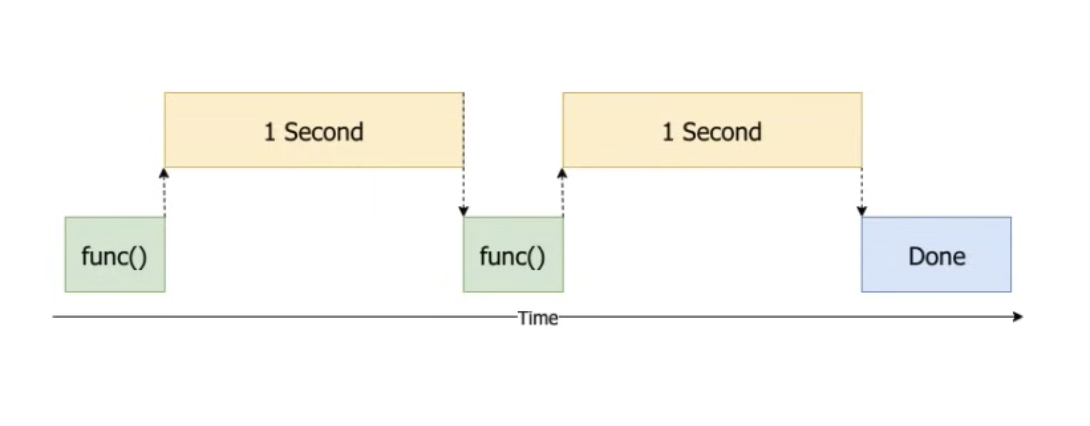

```python
import multiprocessing
import time


def do_something(seconds: float) -> None:
    print(f"Sleeping for {seconds} second...")
    time.sleep(seconds)
    print("Done sleeping...")


def main() -> None:
    start = time.perf_counter()

    processes = []
    for _ in range(100):
        p = multiprocessing.Process(target=do_something, args=[1.5])
        p.start()
        processes.append(p)

    for p in processes:
        p.join()

    finish = time.perf_counter()
    print(f"Finished in {round(number=finish-start,ndigits= 2)} seconds")


if __name__ == "__main__":
    multiprocessing.freeze_support()
    main()
```

**How the above code is running with multi-processing:**
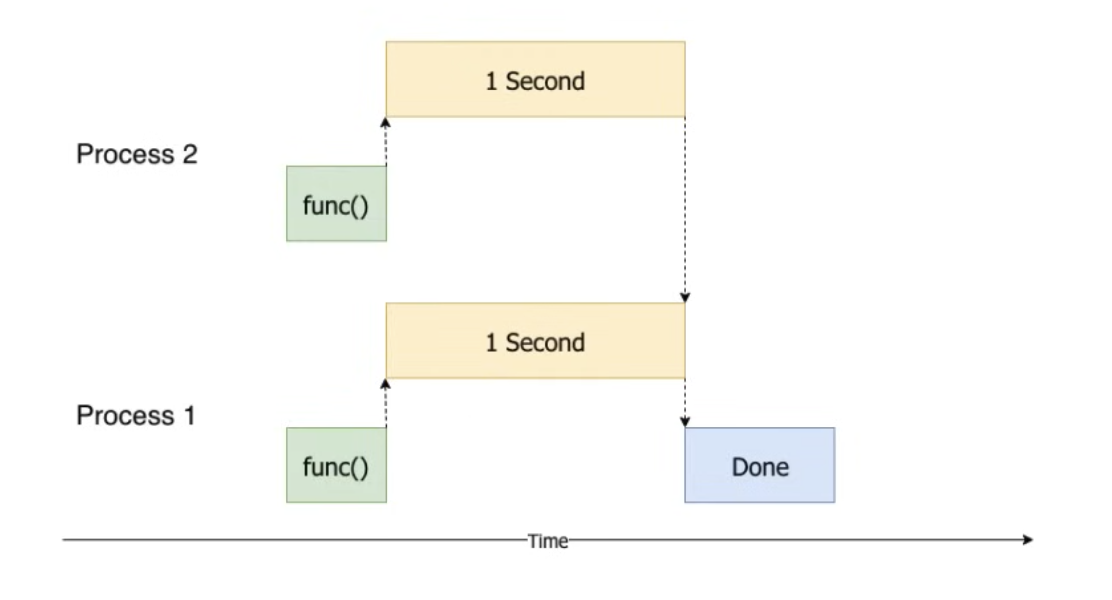

## Multiprocessing with concurrent module

```python
import concurrent.futures
import multiprocessing
import time


def do_something(seconds: float) -> str:
    print(f"Sleeping for {seconds} second...")
    time.sleep(seconds)
    return f"Done sleeping..{seconds}"


def main():
    start = time.perf_counter()
    with concurrent.futures.ProcessPoolExecutor() as executor:
        secs = [5, 4, 3, 2, 1]
        results = executor.map(do_something, secs)
        for result in results:
            print(result)

    finish = time.perf_counter()
    print(f"Finished in {round(number=finish-start,ndigits= 2)} seconds")


if __name__ == "__main__":
    multiprocessing.freeze_support()
    main()
```